In [2]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns 

from collections import Counter


### Paso 2: Cargando los datos


In [3]:
hotels = pd.read_csv("DataBases/hotels_info_eu.csv")
ratings = pd.read_csv("DataBases/reviews_eu_with_user_id.csv")

In [4]:
# Remove columns from the DataFrame
ratings = ratings.drop(columns=['Unnamed: 0', 'temp_id'])
ratings.head()

,user_id,hotel_id,Hotel_Name,Hotel_Address,Reviewer_Nationality,Negative_Review,Positive_Review,Reviewer_Score,Review_Date,given_reviews
0,1,831,H10 Itaca,Avenida Roma 22 30 Eixample 08015 Barcelona Spain,United Arab Emirates,No variety in the breakfast buffet as we can ...,The staff ate very friendly and the location ...,5.4,9/8/2015,3
1,2,913,Jaz Amsterdam,De Passage 90 Noord Holland Zuidoost 1101 AX A...,United Arab Emirates,nothing,bedroom decoration and facilities were great,9.6,6/1/2016,4
2,3,1384,Hotel Manin,Via Manin 7 Milan City Center 20121 Milan Italy,South Africa,At reception not all the staff were courteous,Location,7.1,10/14/2015,1
3,4,77,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,United States of America,No Negative,Small boutique hotel with friendly staff in a...,10.0,12/21/2016,4
4,5,15,Crowne Plaza London Kings Cross,1 Kings Cross Road Islington London WC1X 9HX U...,United Kingdom,Extra charge to use swimming pool,Lovely room good breakfast,7.9,3/27/2016,1


In [5]:
hotels = hotels.drop(columns=['Unnamed: 0'])
hotels.head()

,hotel_id,hotel_country,Hotel_Name,Hotel_Address
0,0,Netherlands,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
1,1,United Kingdom,K K Hotel George,1 15 Templeton Place Earl s Court Kensington a...
2,2,United Kingdom,Apex Temple Court Hotel,1 2 Serjeant s Inn Fleet Street City of London...
3,3,United Kingdom,The Park Grand London Paddington,1 3 Queens Garden Westminster Borough London W...
4,4,France,Monhotel Lounge SPA,1 3 Rue d Argentine 16th arr 75116 Paris France


### Paso 3: Limpieza y Exploracion de los Datos


In [6]:
contador_paises = Counter(pais for pais in hotels['hotel_country'])

print(f"Existen {len(contador_paises)} países en el dataset.")
contador_paises

Existen 6 países en el dataset.


Counter({'Netherlands': 105,
         'United Kingdom': 400,
         'France': 458,
         'Spain': 211,
         'Italy': 162,
         'Austria': 158})

In [7]:
numero = 3
print(f"Top {numero} de países por hoteles: \n", contador_paises.most_common(numero))

Top 3 de países por hoteles: 
 [('France', 458), ('United Kingdom', 400), ('Spain', 211)]


In [8]:
contador_nacs = Counter(pais for pais in ratings['Reviewer_Nationality'])

print(f"Existen {len(contador_nacs)} nacionalidades en el dataset.")
numero = 10
print(f"Top {numero} de nacionalidades por usuario: \n", contador_nacs.most_common(numero))

Existen 227 nacionalidades en el dataset.
Top 10 de nacionalidades por usuario: 
 [(' United Kingdom ', 245246), (' United States of America ', 35437), (' Australia ', 21686), (' Ireland ', 14827), (' United Arab Emirates ', 10235), (' Saudi Arabia ', 8951), (' Netherlands ', 8772), (' Switzerland ', 8678), (' Germany ', 7941), (' Canada ', 7894)]


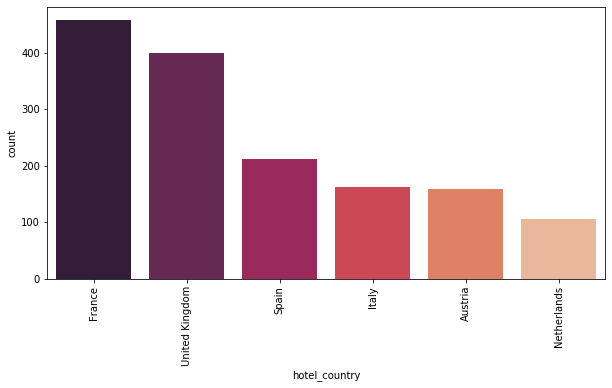

In [9]:
genres_counts_df = pd.DataFrame([contador_paises]).T.reset_index()
genres_counts_df.columns = ['hotel_country', 'count']
genres_counts_df = genres_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='hotel_country', y='count', data=genres_counts_df, palette='rocket')
plt.xticks(rotation=90)
plt.show()

#### Extrayendo el año de la fecha de las reseñas

In [10]:
import re

def extraer_anio_resena_hotel(fecha):
    t = fecha.split('/')
    year = None
    month = None
    if re.search(r'\d+', t[-1]):
        year = t[-1]
        year = int(year)
    return year

def extraer_anio_mes_resena(fecha):
    t = fecha.split('/')
    year = None
    month = None
    if re.search(r'\d+', t[-1]):
        year = t[-1]
        month = t[0]
        if len(month) == 1:
            month = '0'+month
    return year+'.'+month

def leer_pais_de_hotel(hotel_id):
    return hotels['hotel_country'].iloc[hotel_id]

In [68]:
ff = '8/3/2017'
dd = extraer_anio_mes_resena(ff)
print(dd)


2017.08


In [14]:
# prueba
fecha = '8/3/2017'
year = extraer_anio_resena_hotel(fecha)
print(year)
type(year)

hotel = leer_pais_de_hotel(1)
print(hotel)

2017
United Kingdom


In [11]:
ratings['year'] = ratings['Review_Date'].apply(extraer_anio_mes_resena)
ratings['hotel_country'] = ratings['hotel_id'].apply(leer_pais_de_hotel)
ratings.head()

,user_id,hotel_id,Hotel_Name,Hotel_Address,Reviewer_Nationality,Negative_Review,Positive_Review,Reviewer_Score,Review_Date,given_reviews,year,hotel_country
0,1,831,H10 Itaca,Avenida Roma 22 30 Eixample 08015 Barcelona Spain,United Arab Emirates,No variety in the breakfast buffet as we can ...,The staff ate very friendly and the location ...,5.4,9/8/2015,3,2015.09,Spain
1,2,913,Jaz Amsterdam,De Passage 90 Noord Holland Zuidoost 1101 AX A...,United Arab Emirates,nothing,bedroom decoration and facilities were great,9.6,6/1/2016,4,2016.06,Netherlands
2,3,1384,Hotel Manin,Via Manin 7 Milan City Center 20121 Milan Italy,South Africa,At reception not all the staff were courteous,Location,7.1,10/14/2015,1,2015.10,Italy
3,4,77,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,United States of America,No Negative,Small boutique hotel with friendly staff in a...,10.0,12/21/2016,4,2016.12,United Kingdom
4,5,15,Crowne Plaza London Kings Cross,1 Kings Cross Road Islington London WC1X 9HX U...,United Kingdom,Extra charge to use swimming pool,Lovely room good breakfast,7.9,3/27/2016,1,2016.03,United Kingdom


#### Años distintos en el Dataset

In [12]:
unique_years = ratings['year'].nunique()
print(f"Total de fechas distintos en el dataset: {unique_years}")

Total de fechas distintos en el dataset: 25


In [14]:
contador_anios = Counter(res for res in ratings['year'])

print(f"Las reseñas están distribuidas a lo large de {len(contador_anios)} meses.")
contador_anios
sorted(contador_anios.items(), key=lambda item: item[0], reverse=False)

Las reseñas están distribuidas a lo large de 25 meses.


[('2015.08', 19320),
 ('2015.09', 19738),
 ('2015.10', 19486),
 ('2015.11', 18056),
 ('2015.12', 17927),
 ('2016.01', 19510),
 ('2016.02', 18856),
 ('2016.03', 20744),
 ('2016.04', 21481),
 ('2016.05', 23071),
 ('2016.06', 20941),
 ('2016.07', 25885),
 ('2016.08', 27274),
 ('2016.09', 22690),
 ('2016.10', 24357),
 ('2016.11', 17914),
 ('2016.12', 21680),
 ('2017.01', 22641),
 ('2017.02', 19514),
 ('2017.03', 20366),
 ('2017.04', 21402),
 ('2017.05', 23419),
 ('2017.06', 21955),
 ('2017.07', 23433),
 ('2017.08', 4078)]

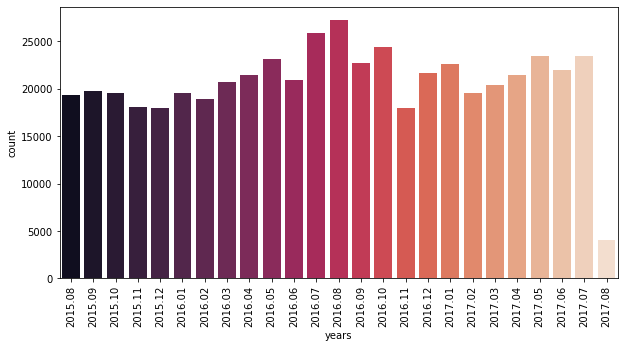

In [15]:
years_counts_df = pd.DataFrame([contador_anios]).T.reset_index()
years_counts_df.columns = ['years', 'count']
years_counts_df = years_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='years', y='count', data=years_counts_df, palette='rocket')
plt.xticks(rotation=90)
plt.show()

In [16]:
unique_nal = ratings['Reviewer_Nationality'].nunique()
print(f"Total de nacionalidades en el dataset: {unique_nal}")

Total de nacionalidades en el dataset: 227


limpiando datos nulos del dataset

In [17]:
print(f"Total reseñas antes de eliminar nulos: {ratings['hotel_id'].nunique()}")
ratings = ratings[~ratings['hotel_country'].isnull()]
print(f"Total reseñas después de eliminar nulos: {ratings['hotel_id'].nunique()}")

Total reseñas antes de eliminar nulos: 1494
Total reseñas después de eliminar nulos: 1494


#### Transformando los datos

##### paises hoteles vs años reseñas

Las filas representan los hoteles y las columnas las características (países y años)

`hotel_country` :: cada país sea representado por una característica binaria (1 si pertenece a un país determinado, 0 si no pertenece)

In [18]:
paises = list(contador_paises.keys())

for g in paises:
    ratings[g] = ratings['hotel_country'].transform(lambda x : int(g in x))

In [19]:
print(paises)
ratings[paises].head()

['Netherlands', 'United Kingdom', 'France', 'Spain', 'Italy', 'Austria']


,Netherlands,United Kingdom,France,Spain,Italy,Austria
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


Los países se representan como columnas con propiedades binarias

Se le asignan los años a cada columna correspondiente. 

Se usa la función `get_dummies()`de pandas 
para crear variables categóricas en variables binarias

In [20]:
review_year = pd.get_dummies(ratings['year'], dtype=bool)
review_year.head()

,2015.08,2015.09,2015.10,2015.11,2015.12,2016.01,2016.02,2016.03,2016.04,2016.05,...,2016.11,2016.12,2017.01,2017.02,2017.03,2017.04,2017.05,2017.06,2017.07,2017.08
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


nuevo dataframe con las propiedades de año y país: `review_features`

se utiliza la función `concat` de pandas, concatenando países y fechas en un solo dataframe


In [21]:
review_features = pd.concat([ratings[paises], review_year], axis=1)
review_features.head()

,Netherlands,United Kingdom,France,Spain,Italy,Austria,2015.08,2015.09,2015.10,2015.11,...,2016.11,2016.12,2017.01,2017.02,2017.03,2017.04,2017.05,2017.06,2017.07,2017.08
0,0,0,0,1,0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,0,1,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1,0,0,0,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,0,1,0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
print(len(review_features))

515738


In [23]:
rev_features = review_features.iloc[0:100000, :]

rev_features.head()
print(len(rev_features))

100000


### Construyendo el Sistema de Recomendación

"Hoteles parecidos" utilizando la similitud Coseno

`cosine similarity` 



In [24]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(rev_features, rev_features)
print(f"Las dimensiones de similaridad coseno de las caracteristicas de la matriz de similitud son: {cosine_sim.shape}")


Las dimensiones de similaridad coseno de las caracteristicas de la matriz de similitud son: (100000, 100000)


In [33]:
#del cosine_sim
rev_features

,Netherlands,United Kingdom,France,Spain,Italy,Austria,2015.08,2015.09,2015.10,2015.11,...,2016.11,2016.12,2017.01,2017.02,2017.03,2017.04,2017.05,2017.06,2017.07,2017.08
0,0,0,0,1,0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,0,1,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1,0,0,0,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,0,1,0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1,0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99996,0,1,0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99997,0,0,0,0,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99998,0,0,0,1,0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [27]:
from fuzzywuzzy import process

def encuentra_hotel(nombre_hotel):
    all_hotels = hotels['Hotel_Name'].tolist()
    closest_match = process.extractOne(nombre_hotel, all_hotels)
    return closest_match[0]

/Users/feratus/opt/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [64]:
hotel = encuentra_hotel('Britannia International Hotel')
print(f"El nombre corecto del hotel es: {hotel}")

El nombre corecto del hotel es: Britannia International Hotel Canary Wharf


In [65]:
hotel_idx = dict(zip(hotels['Hotel_Name'], list(hotels.index)))
idx = hotel_idx[hotel]
print(f"El indice del hotel '{hotel}' en la matriz hotel_idx es: {idx}")

El indice del hotel 'Britannia International Hotel Canary Wharf' en la matriz hotel_idx es: 186


In [66]:
num_recomendaciones = 5
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(num_recomendaciones+1)]
similar_hotels = [i[0] for i in sim_scores]
similar_hotels

[755, 1160, 1230, 1765, 2018]

In [72]:
#hotel_cos = hotels[['Hotel_Name', 'hotel_country']].iloc[similar_hotels]
hotel_cos = hotels[hotels['hotel_id'] == 2018]
hotel_cos

,hotel_id,hotel_country,Hotel_Name,Hotel_Address


In [63]:
print(f"Porque te hospedaste en el hotel '{hotel}',")
print(f"Te pueden interesar los siguientes hoteles:")
for i in similar_hotels:
    print(f"\t* ({i}) '{hotels.loc[hotels['hotel_id']==i].Hotel_Name.values[0]}' en {hotels.loc[hotels['hotel_id'] == i].hotel_country.values[0]}")
    print(f"\t       [reseña promedio: {round(ratings[ratings['hotel_id'] == i]['Reviewer_Score'].mean(), 2)}]")


Porque te hospedaste en el hotel 'Hotel Esther a',
Te pueden interesar los siguientes hoteles:
	* (39) 'The Nadler Victoria' en United Kingdom
	       [reseña promedio: 9.31]
	* (163) 'Le Marquis Eiffel' en France
	       [reseña promedio: 8.78]
	* (258) 'Okko Hotels Paris Porte De Versailles' en France
	       [reseña promedio: 9.08]
	* (274) 'H tel Le M' en France
	       [reseña promedio: 8.23]
	* (283) 'Mercure Paris Notre Dame Saint Germain des Pr s' en France
	       [reseña promedio: 8.18]


recomendaciones basadas en otros nombres de hotel

In [77]:
def obtener_recomendaciones_basadas_contenido(nombre_string, numero_recomendaciones=5):
    title = encuentra_hotel(nombre_string)
    idx = hotel_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(numero_recomendaciones+1)]
    similar_hotels = [i[0] for i in sim_scores]
    print(f"Los Hoteles recomendados con base en el Hotel {title} son:")
    print(hotels['Hotel_Name'].iloc[similar_hotels])

In [78]:
obtener_recomendaciones_basadas_contenido('Hotel Ester', 5)

Los Hoteles recomendados con base en el Hotel Hotel Esther a son:
39                                 The Nadler Victoria
163                                  Le Marquis Eiffel
258              Okko Hotels Paris Porte De Versailles
274                                         H tel Le M
283    Mercure Paris Notre Dame Saint Germain des Pr s
Name: Hotel_Name, dtype: object
